In [1]:
setwd("./")
getwd()

library(foreign)
Data <- read.spss("BASE_P02.sav",to.data.frame = TRUE)


[1] "/home/dev/Documents/ESAN/Multivariado I/PC02"

In [2]:
library(dplyr)

attach(Data)

glimpse(Data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 30,564
Columns: 13
$ CodCli       <dbl> 10549, 10846, 11105, 12477, 13306, 13336, 14341, 14634, 1…
$ DurMes       <dbl> 36.56667, 60.86667, 12.30000, 18.33333, 85.90000, 48.7000…
$ Tasa         <dbl> 13.0, 14.0, 34.0, 15.0, 11.0, 13.0, 36.0, 50.0, 34.0, 13.…
$ NroCuo       <dbl> 36, 58, 12, 18, 84, 48, 36, 12, 12, 12, 24, 18, 24, 24, 1…
$ CuoCan       <dbl> 4, 15, 1, 6, 24, 29, 12, 1, 3, 10, 11, 2, 18, 0, 2, 15, 4…
$ CuoPen       <dbl> 32, 43, 11, 12, 60, 19, 24, 11, 9, 2, 13, 16, 6, 0, 10, 2…
$ CuoVen       <dbl> 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, …
$ DiasMora     <dbl> 0, 0, 0, 0, 0, 48, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ ImpCuo_Sol   <dbl> 668.98, 2227.13, 733.67, 1179.45, 2398.18, 265.62, 219.39…
$ Desem_Sol    <dbl> 20000, 92700, 7500, 19000, 164305, 10000, 5000, 5000, 750…
$ SalAct_Sol   <dbl> 18135.32, 74123.03, 6960.13, 13117.27, 129047.78, 4552.43…
$ CapPag_Sol   <dbl> 1864.68, 18576.97, 539.87, 5882.73, 35257.22, 5447.57, 11…
$ InterPag_Sol 

In [3]:
head(Data)

,CodCli,DurMes,Tasa,NroCuo,CuoCan,CuoPen,CuoVen,DiasMora,ImpCuo_Sol,Desem_Sol,SalAct_Sol,CapPag_Sol,InterPag_Sol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10549,36.56667,13,36,4,32,0,0,668.98,20000,18135.32,1864.68,811.24
2,10846,60.86667,14,58,15,43,0,0,2227.13,92700,74123.03,18576.97,14829.98
3,11105,12.30000,34,12,1,11,1,0,733.67,7500,6960.13,539.87,193.80
4,12477,18.33333,15,18,6,12,0,0,1179.45,19000,13117.27,5882.73,1193.97
5,13306,85.90000,11,84,24,60,0,0,2398.18,164305,129047.78,35257.22,31891.82
6,13336,48.70000,13,48,29,19,2,48,265.62,10000,4552.43,5447.57,2255.41


In [4]:
datos_perdidos <- colSums(is.na(Data))  |> as.data.frame()
datos_perdidos

,colSums(is.na(Data))
,<dbl>
CodCli,0
DurMes,0
Tasa,0
NroCuo,0
CuoCan,0
CuoPen,0
CuoVen,0
DiasMora,0
ImpCuo_Sol,0


In [5]:
library(knitr)
kable(summary(Data[, -1]))




|   |    DurMes     |     Tasa     |    NroCuo  |    CuoCan     |    CuoPen     |    CuoVen      |   DiasMora     |  ImpCuo_Sol    |  Desem_Sol    |  SalAct_Sol     |  CapPag_Sol     | InterPag_Sol    |
|:--|:--------------|:-------------|:-----------|:--------------|:--------------|:---------------|:---------------|:---------------|:--------------|:----------------|:----------------|:----------------|
|   |Min.   :  1.00 |Min.   : 6.70 |Min.   :  1 |Min.   : 0.000 |Min.   :-10.00 |Min.   : 0.0000 |Min.   :   0.00 |Min.   :    0.0 |Min.   :   900 |Min.   :     0.2 |Min.   :     0.0 |Min.   :     0.0 |
|   |1st Qu.: 12.20 |1st Qu.:33.00 |1st Qu.: 12 |1st Qu.: 2.000 |1st Qu.:  5.00 |1st Qu.: 0.0000 |1st Qu.:   0.00 |1st Qu.:  182.4 |1st Qu.:  2900 |1st Qu.:  1683.2 |1st Qu.:   279.4 |1st Qu.:   188.7 |
|   |Median : 18.20 |Median :47.00 |Median : 18 |Median : 5.000 |Median : 10.00 |Median : 0.0000 |Median :   0.00 |Median :  275.1 |Median :  4000 |Median :  2870.5 |Median :   832.3 |Me

In [6]:
library(ggplot2)
library(tidyr)
library(dplyr)
Data_norm <- as.data.frame(lapply(Data[,-1], function(x) {
  (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))
}))

Data_long <- pivot_longer(Data_norm, cols = everything(), names_to = "Variable", values_to = "Valor")




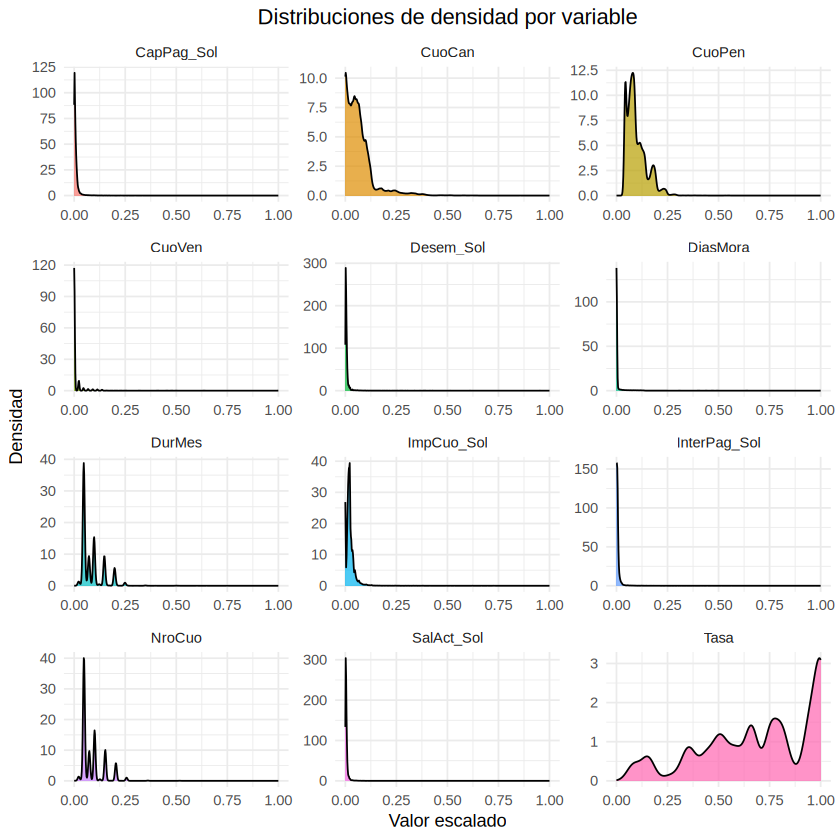

In [7]:
ggplot(Data_long, aes(x = Valor, fill = Variable)) +
  geom_density(alpha = 0.7) + 
  facet_wrap(~ Variable, scales = "free", ncol = 3) +  
  theme_minimal() + 
  labs(title = "Distribuciones de densidad por variable",
       x = "Valor escalado",
       y = "Densidad") +
  theme(legend.position = "none",  
        plot.title = element_text(hjust = 0.5))


In [8]:
Data_scaled <- scale(Data)
Data_scaled <- as.data.frame(Data_scaled)
head(Data_scaled)

,CodCli,DurMes,Tasa,NroCuo,CuoCan,CuoPen,CuoVen,DiasMora,ImpCuo_Sol,Desem_Sol,SalAct_Sol,CapPag_Sol,InterPag_Sol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-3.146124,1.1714598,-2.1127673,1.2035300,-0.30392287,1.68026572,-0.2735320,-0.2200883,0.9072570,1.00263082,1.15467128,0.05447352,0.004163405
2,-3.145728,3.0760976,-2.0433633,2.9685918,1.48178665,2.64207518,-0.2735320,-0.2200883,5.1526634,6.39558311,6.01898504,4.08476200,6.767449719
3,-3.145383,-0.7305652,-0.6552835,-0.7219920,-0.79093456,-0.15591598,0.7018773,-0.2200883,1.0835143,0.07536942,0.18375051,-0.26501390,-0.293718109
4,-3.143556,-0.2576716,-1.9739593,-0.2406115,0.02075159,-0.06847876,-0.2735320,-0.2200883,2.2981068,0.92844991,0.71869399,1.02345507,0.188809997
5,-3.142452,5.0382141,-2.2515753,5.0545740,2.94282171,4.12850799,-0.2735320,-0.2200883,5.6187140,11.70730730,10.79094691,8.10732380,14.998867733
6,-3.142412,2.1224724,-2.1127673,2.1662910,3.75450785,0.54358181,1.6772865,1.5059901,-0.1917561,0.26082170,-0.02543484,0.91851312,0.700897576


In [ ]:
library(knitr)
kable(summary(Data_scaled[, -1]))



|   |    DurMes      |     Tasa       |    NroCuo      |    CuoCan      |    CuoPen      |    CuoVen      |   DiasMora     |  ImpCuo_Sol    |  Desem_Sol      |  SalAct_Sol     |  CapPag_Sol     | InterPag_Sol    |
|:--|:---------------|:---------------|:---------------|:---------------|:---------------|:---------------|:---------------|:---------------|:----------------|:----------------|:----------------|:----------------|
|   |Min.   :-1.6163 |Min.   :-2.5500 |Min.   :-1.6045 |Min.   :-0.9533 |Min.   :-1.9921 |Min.   :-0.2735 |Min.   :-0.2201 |Min.   :-0.9155 |Min.   :-0.41422 |Min.   :-0.42094 |Min.   :-0.39521 |Min.   :-0.38722 |
|   |1st Qu.:-0.7384 |1st Qu.:-0.7247 |1st Qu.:-0.7220 |1st Qu.:-0.6286 |1st Qu.:-0.6805 |1st Qu.:-0.2735 |1st Qu.:-0.2201 |1st Qu.:-0.4184 |1st Qu.:-0.26586 |1st Qu.:-0.27472 |1st Qu.:-0.32783 |1st Qu.:-0.29618 |
|   |Median :-0.2681 |Median : 0.2470 |Median :-0.2406 |Median :-0.1416 |Median :-0.2434 |Median :-0.2735 |Median :-0.2201 |Median :-0.1659 |M

In [ ]:
desv_stnd <- round(apply(Data[,-1], 2, sd), 3 )
desv_stnd_scaled <- round(apply(Data_scaled[,-1], 2, sd), 3 )
desv_stnd <- as.data.frame(desv_stnd) 
desv_stnd$scaled <- desv_stnd_scaled
desv_stnd


,desv_stnd,scaled
,<dbl>,<dbl>
DurMes,12.758,1
Tasa,14.408,1
NroCuo,12.464,1
CuoCan,6.160,1
CuoPen,11.437,1
CuoVen,1.025,1
DiasMora,27.809,1
ImpCuo_Sol,367.020,1
Desem_Sol,13480.557,1


In [11]:
library(ggplot2)
library(reshape2)
corr_matrix <- cor(Data_scaled[,-1])
corr_matrix[lower.tri(corr_matrix)] <- NA
corr_melted <- melt(corr_matrix, na.rm = TRUE)
corr_melted


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,DurMes,DurMes,1.00000000
13,DurMes,Tasa,-0.46704449
14,Tasa,Tasa,1.00000000
25,DurMes,NroCuo,0.99312450
26,Tasa,NroCuo,-0.46617009
27,NroCuo,NroCuo,1.00000000
37,DurMes,CuoCan,0.45200384
38,Tasa,CuoCan,-0.33853782
39,NroCuo,CuoCan,0.45214241


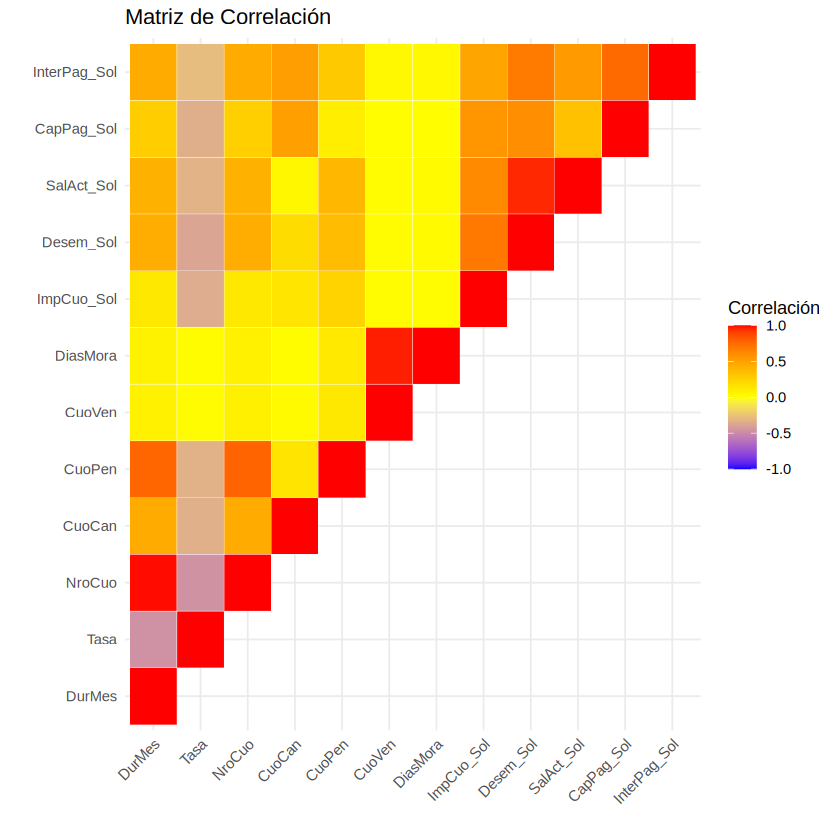

In [12]:

ggplot(corr_melted, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "yellow", 
                       midpoint = 0, limit = c(-1, 1), 
                       name = "Correlación") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   hjust = 1)) +
  labs(title = "Matriz de Correlación", x = "", y = "")

In [13]:
corr_melted_filtered <- corr_melted %>%
  filter(value > 0.9) %>%
  filter(Var1 != Var2)

corr_melted_filtered

Var1,Var2,value
<fct>,<fct>,<dbl>
DurMes,NroCuo,0.9931245
CuoVen,DiasMora,0.9728110
Desem_Sol,SalAct_Sol,0.9571043



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




[1] 2

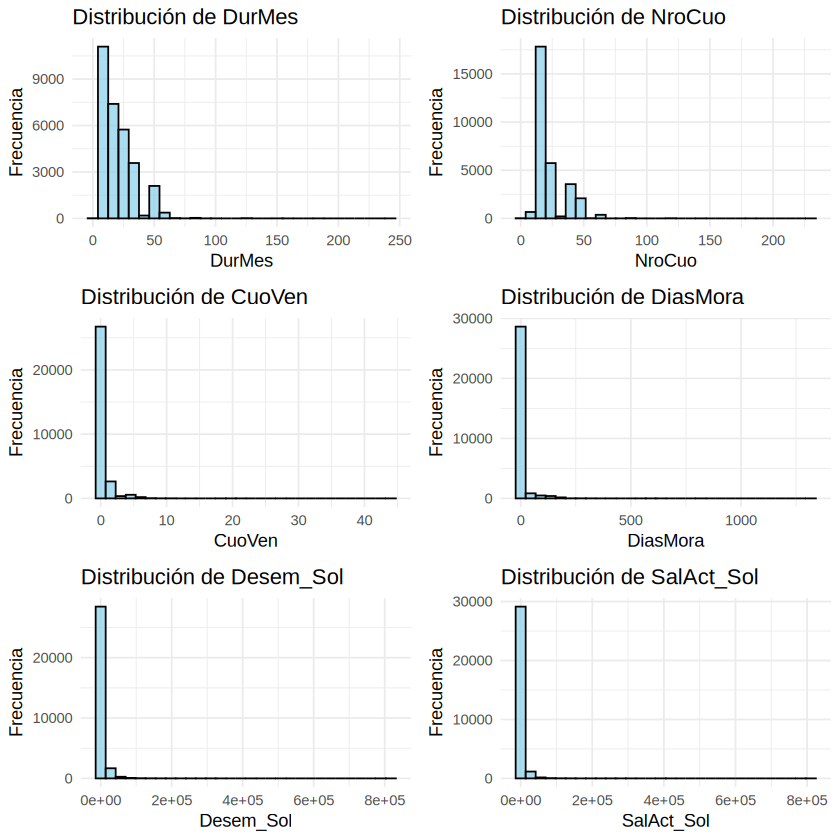

In [14]:
library(gridExtra)

p1 <- ggplot(Data, aes(x = DurMes)) + 
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribución de DurMes", x = "DurMes", y = "Frecuencia") +
  theme_minimal()

p2 <- ggplot(Data, aes(x = NroCuo)) + 
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribución de NroCuo", x = "NroCuo", y = "Frecuencia") +
  theme_minimal()

p3 <- ggplot(Data, aes(x = CuoVen)) + 
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribución de CuoVen", x = "CuoVen", y = "Frecuencia") +
  theme_minimal()

p4 <- ggplot(Data, aes(x = DiasMora)) + 
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribución de DiasMora", x = "DiasMora", y = "Frecuencia") +
  theme_minimal()

p5 <- ggplot(Data, aes(x = Desem_Sol)) + 
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribución de Desem_Sol", x = "Desem_Sol", y = "Frecuencia") +
  theme_minimal()

p6 <- ggplot(Data, aes(x = SalAct_Sol)) + 
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribución de SalAct_Sol", x = "SalAct_Sol", y = "Frecuencia") +
  theme_minimal()

grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 2)
2

In [15]:
x <- Data_scaled[, !names(Data_scaled) %in% c("NroCuo", "CuoVen","Desem_Sol", "CodCli")]
head(x)

,DurMes,Tasa,CuoCan,CuoPen,DiasMora,ImpCuo_Sol,SalAct_Sol,CapPag_Sol,InterPag_Sol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.1714598,-2.1127673,-0.30392287,1.68026572,-0.2200883,0.9072570,1.15467128,0.05447352,0.004163405
2,3.0760976,-2.0433633,1.48178665,2.64207518,-0.2200883,5.1526634,6.01898504,4.08476200,6.767449719
3,-0.7305652,-0.6552835,-0.79093456,-0.15591598,-0.2200883,1.0835143,0.18375051,-0.26501390,-0.293718109
4,-0.2576716,-1.9739593,0.02075159,-0.06847876,-0.2200883,2.2981068,0.71869399,1.02345507,0.188809997
5,5.0382141,-2.2515753,2.94282171,4.12850799,-0.2200883,5.6187140,10.79094691,8.10732380,14.998867733
6,2.1224724,-2.1127673,3.75450785,0.54358181,1.5059901,-0.1917561,-0.02543484,0.91851312,0.700897576


In [ ]:
bartlett.test(Data[,-1])


	Bartlett test of homogeneity of variances

data:  Data[, -1]
Bartlett's K-squared = 2861223, df = 11, p-value < 2.2e-16


In [17]:
library(psych)
KMO(x)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = x)
Overall MSA =  0.6
MSA for each item = 
      DurMes         Tasa       CuoCan       CuoPen     DiasMora   ImpCuo_Sol 
        0.53         0.80         0.61         0.51         0.67         0.53 
  SalAct_Sol   CapPag_Sol InterPag_Sol 
        0.56         0.66         0.71 

In [18]:
KMO(Data_scaled[,-1])

Error in solve.default(r) : 
  system is computationally singular: reciprocal condition number = 3.4046e-18


matrix is not invertible, image not found



Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = Data_scaled[, -1])
Overall MSA =  0.5
MSA for each item = 
      DurMes         Tasa       NroCuo       CuoCan       CuoPen       CuoVen 
         0.5          0.5          0.5          0.5          0.5          0.5 
    DiasMora   ImpCuo_Sol    Desem_Sol   SalAct_Sol   CapPag_Sol InterPag_Sol 
         0.5          0.5          0.5          0.5          0.5          0.5 

In [19]:
autocor <- eigen(cor(x))
autocor

eigen() decomposition
$values
[1] 3.69378823 1.41090526 1.19077952 0.99634803 0.71714919 0.39173069 0.33388289
[8] 0.17075623 0.09465996

$vectors
             [,1]         [,2]        [,3]        [,4]        [,5]         [,6]
 [1,]  0.37721864 -0.489941465  0.18634336  0.08891828  0.16029056  0.105011920
 [2,] -0.32154553  0.121827339 -0.06649242 -0.23687596  0.83370393 -0.192614686
 [3,]  0.29819922  0.113118068  0.65126920 -0.04529363 -0.01513393  0.001729154
 [4,]  0.30812650 -0.582549854 -0.10868118  0.04801391  0.19599652 -0.495611989
 [5,]  0.03737637 -0.196373256 -0.04994893 -0.95118907 -0.21744017  0.072624564
 [6,]  0.34033713  0.306769720 -0.45813797 -0.01938018 -0.18748524 -0.518701237
 [7,]  0.35662306 -0.007741349 -0.53106754  0.05315215  0.14713079  0.583495803
 [8,]  0.38025040  0.444995775  0.15084188 -0.10571063  0.03855932 -0.205472648
 [9,]  0.42597315  0.249407590  0.08786604 -0.11176023  0.36747216  0.221869746
               [,7]        [,8]        [,9]
 [1,] -0.

In [ ]:
AutoVal <- round(autocor$values,5) %>% as.data.frame()
VarExpFact <- round(autocor$values/sum(autocor$values)*100,5) %>% as.data.frame()
VarExpFactAcum <- round(cumsum(autocor$values/sum(autocor$values)*100),5) %>% as.data.frame()
CantFactor <- cbind(AutoVal,VarExpFact,VarExpFactAcum) %>% as.data.frame()
colnames(CantFactor) <- c("AUTO VALORES","VARIANZA EXPLICADA","VARIANZA ACUMULADA")
CantFactor

AUTO VALORES,VARIANZA EXPLICADA,VARIANZA ACUMULADA
<dbl>,<dbl>,<dbl>
3.69379,41.04209,41.04209
1.41091,15.67673,56.71882
1.19078,13.23088,69.94970
0.99635,11.07053,81.02023
0.71715,7.96832,88.98856
0.39173,4.35256,93.34112
0.33388,3.70981,97.05093
0.17076,1.89729,98.94822
0.09466,1.05178,100.00000


In [21]:
Factorial <- factanal(x,factor = 3,rotation = "varimax",scores = "regression")
Factorial


Call:
factanal(x = x, factors = 3, scores = "regression", rotation = "varimax")

Uniquenesses:
      DurMes         Tasa       CuoCan       CuoPen     DiasMora   ImpCuo_Sol 
       0.005        0.704        0.459        0.302        0.993        0.233 
  SalAct_Sol   CapPag_Sol InterPag_Sol 
       0.363        0.137        0.294 

Loadings:
             Factor1 Factor2 Factor3
DurMes        0.394   0.916         
Tasa         -0.303  -0.384  -0.239 
CuoCan        0.708   0.186         
CuoPen                0.818   0.157 
DiasMora                            
ImpCuo_Sol    0.204           0.849 
SalAct_Sol            0.432   0.664 
CapPag_Sol    0.810           0.454 
InterPag_Sol  0.690   0.208   0.433 

               Factor1 Factor2 Factor3
SS loadings      1.936   1.934   1.642
Proportion Var   0.215   0.215   0.182
Cumulative Var   0.215   0.430   0.612

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 13537.52 on 12 degrees of freedom.
The p-valu

In [ ]:
Fac1 <- c(Factorial$loadings[,"Factor1"]) %>% as.data.frame()
Fac2 <- c(Factorial$loadings[,"Factor2"]) %>% as.data.frame()
Fac3 <- c(Factorial$loadings[,"Factor3"]) %>% as.data.frame()

Cargas <- data.frame(Fac1,Fac2, Fac3)
colnames(Cargas) <- c("Fac1","Fac2", "Fac3")
Cargas

,Fac1,Fac2,Fac3
,<dbl>,<dbl>,<dbl>
DurMes,0.3942940670,0.91602577,-0.02110789
Tasa,-0.3030322825,-0.38381800,-0.23858412
CuoCan,0.7078498478,0.18645752,-0.06981278
CuoPen,0.0704848026,0.81789325,0.15653727
DiasMora,-0.0001835229,0.07953252,0.02045940
ImpCuo_Sol,0.2040592336,0.07308995,0.84872451
SalAct_Sol,0.0974134179,0.43221015,0.66417713
CapPag_Sol,0.8096332853,-0.04293856,0.45387955
InterPag_Sol,0.6899552841,0.20792515,0.43255584


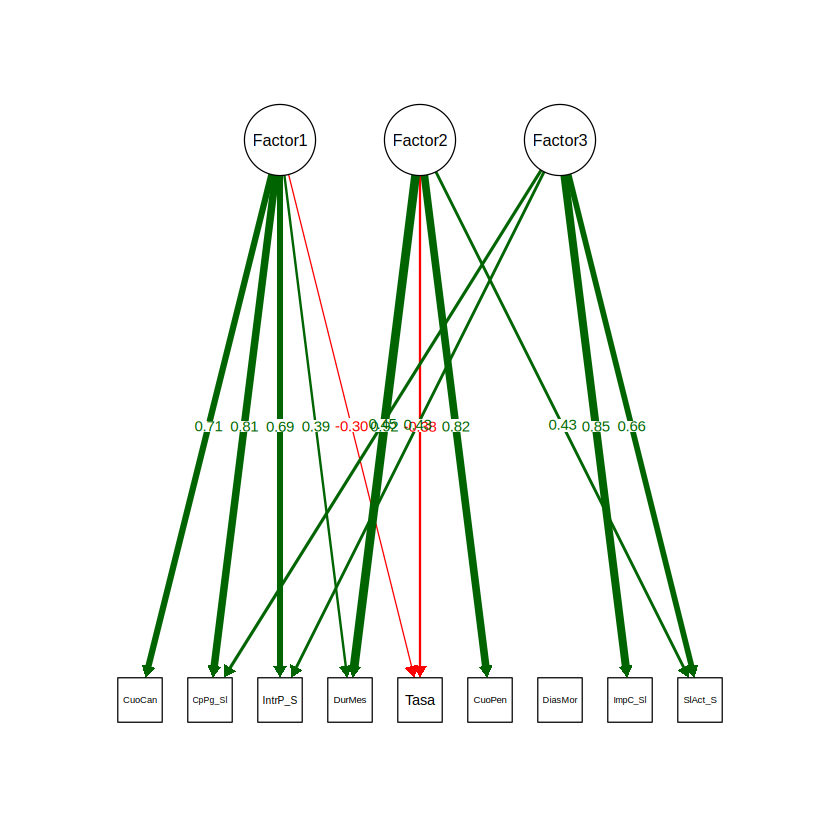

In [23]:
library(semPlot)
semPaths(Factorial, what="est", residuals=FALSE,
         cut=0.3, posCol=c("white", "darkgreen"), negCol=c("white", "red"),
         edge.label.cex=0.75, nCharNodes=7)

In [24]:
scores <- Factorial$scores %>% as.data.frame()
scores


Factor1,Factor2,Factor3
<dbl>,<dbl>,<dbl>
-0.3566555,1.45172740,0.833975849
2.7314613,2.29720381,5.037519748
-0.7699718,-0.43752496,0.997086196
0.1543799,-0.30468744,1.811342446
6.5857018,2.86120625,7.358147558
2.0340456,1.40604138,-1.072684939
0.4186409,1.11754704,-0.605764659
-0.6778674,-0.49929233,0.552634286
-0.4470775,-0.58945704,0.939005112


In [25]:
# install.packages("factoextra")
# install.packages("cluster")
# install.packages("future")
# install.packages("furrr")

# library(factoextra)
# library(future)
# library(furrr)

# plan(multisession) 
# fviz_nbclust(x, kmeans, method = "wss") + 
#   ggtitle("Método de Codo para Determinar el Número de Clusters")

In [26]:

# fviz_nbclust(scores,kmeans, method = "silhouette")+
#   labs(title= "Número optimo de cluster") + 
#   xlab("Valor de k ") +
#   ylab("Promedio de silueta")

In [27]:
N_Cluster <- kmeans(scores,5)

In [28]:
N_Cluster$size

[1] 15830   283  8614  5809    28

In [29]:
SCI <- N_Cluster$withinss %>% as.data.frame()
colnames(SCI) <- c("SC dentro del cluster")

SCE <- N_Cluster$betweenss %>% as.data.frame()
colnames(SCE) <- c("SC entre del cluster")

SCT <- N_Cluster$totss %>% as.data.frame()
colnames(SCT) <- c("SC total")

SC <- cbind(SCI,SCE,SCT)
SC

SC dentro del cluster,SC entre del cluster,SC total
<dbl>,<dbl>,<dbl>
7771.714,46553.8,81004.21
8088.231,46553.8,81004.21
4097.444,46553.8,81004.21
10838.750,46553.8,81004.21
3654.272,46553.8,81004.21


In [30]:
library(cluster)
sil_score <- silhouette(N_Cluster$cluster, dist(scores)) 
sil_df <- as.data.frame(sil_score)
head(sil_df, 10)

,cluster,neighbor,sil_width
,<dbl>,<dbl>,<dbl>
1,4,3,-0.008584945
2,2,4,-0.013645019
3,1,3,0.209249975
4,1,3,0.117199540
5,2,4,0.284527639
6,4,3,0.221672500
7,4,3,0.103485595
8,1,3,0.292136259
9,1,3,0.295159842


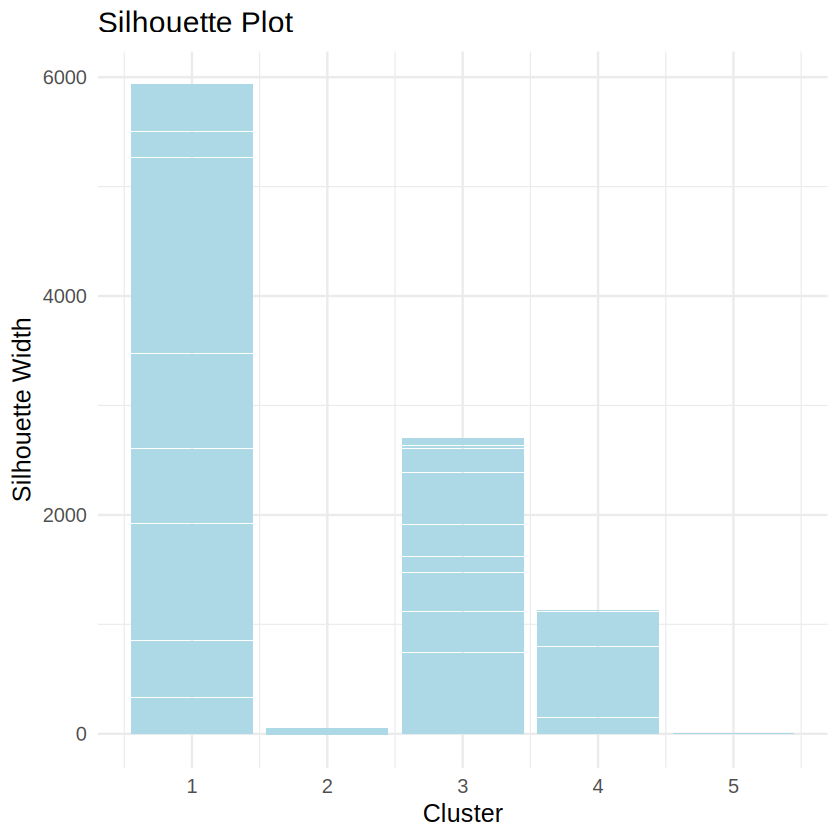

In [31]:

ggplot(sil_df, aes(x = cluster, y = sil_width)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  theme_minimal(base_size = 15) +
  theme(panel.background = element_rect(fill = "white", color = "white")) +
  labs(title = "Silhouette Plot", x = "Cluster", y = "Silhouette Width")

In [32]:
Grupos <- N_Cluster$cluster %>% as.data.frame()
colnames(Grupos) <- c("SEGMENTO")


In [33]:
Data_final <- cbind(x,scores,Grupos)
Data_final

DurMes,Tasa,CuoCan,CuoPen,DiasMora,ImpCuo_Sol,SalAct_Sol,CapPag_Sol,InterPag_Sol,Factor1,Factor2,Factor3,SEGMENTO
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1.1714598,-2.1127673,-0.30392287,1.68026572,-0.2200883,0.90725697,1.154671276,0.054473523,0.004163405,-0.3566555,1.45172740,0.833975849,4
3.0760976,-2.0433633,1.48178665,2.64207518,-0.2200883,5.15266342,6.018985041,4.084761998,6.767449719,2.7314613,2.29720381,5.037519748,2
-0.7305652,-0.6552835,-0.79093456,-0.15591598,-0.2200883,1.08351429,0.183750506,-0.265013900,-0.293718109,-0.7699718,-0.43752496,0.997086196,1
-0.2576716,-1.9739593,0.02075159,-0.06847876,-0.2200883,2.29810678,0.718693993,1.023455069,0.188809997,0.1543799,-0.30468744,1.811342446,1
5.0382141,-2.2515753,2.94282171,4.12850799,-0.2200883,5.61871404,10.790946914,8.107323798,14.998867733,6.5857018,2.86120625,7.358147558,2
2.1224724,-2.1127673,3.75450785,0.54358181,1.5059901,-0.19175606,-0.025434836,0.918513118,0.700897576,2.0340456,1.40604138,-1.072684939,4
1.2054246,-0.5164755,0.99477496,0.98076793,-0.2200883,-0.31771642,-0.089290362,-0.110029425,0.312398213,0.4186409,1.11754704,-0.605764659,4
-0.7410159,0.4551803,-0.79093456,-0.15591598,-0.2200883,0.49300186,-0.016026404,-0.313387616,-0.301504789,-0.6778674,-0.49929233,0.552634286,1
-0.7410159,-0.6552835,-0.46626010,-0.33079043,-0.2200883,1.07702963,0.085854685,0.006714758,-0.132856109,-0.4470775,-0.58945704,0.939005112,1


In [34]:
Tabla_1 <- table(Data_final$SEGMENTO) %>% as.data.frame()
Tabla_2 <- prop.table(table(Data_final$SEGMENTO)) %>% as.data.frame()
Tabla_2

Var1,Freq
<fct>,<dbl>
1,0.5179295904
2,0.0092592593
3,0.2818348384
4,0.1900602015
5,0.0009161105


In [35]:
Resultados_0 <- cbind(Tabla_1$Var1,Tabla_1$Freq,Tabla_2$Freq) %>% as.data.frame()
colnames(Resultados_0) <- c("Segmentos","Frec","Porcentaje")


In [36]:
Resultados_0

Segmentos,Frec,Porcentaje
<dbl>,<dbl>,<dbl>
1,15830,0.5179295904
2,283,0.0092592593
3,8614,0.2818348384
4,5809,0.1900602015
5,28,0.0009161105


In [37]:
# library(sqldf)
# Resultados_1 <- sqldf::sqldf("SELECT SEGMENTO, AVG(Factor1), AVG(Factor2),
#                                      AVG(p5_1),AVG(p5_2),AVG(p5_3),AVG(p5_4),AVG(p5_5),AVG(p5_6),
#                                      AVG(p5_7),AVG(p5_8),AVG(p5_9),AVG(p5_10),AVG(p5_11),
#                                      AVG(p7_1),AVG(p7_2),AVG(p7_3),AVG(p7_4),AVG(p7_5),
#                                      AVG(p7_6),AVG(p7_7)
#                               FROM Data_final
#                               GROUP BY SEGMENTO") %>% as.data.frame()

Loading required package: gsubfn

Loading required package: proto



Loading required package: RSQLite



ERROR: Error: no such column: p5_1


In [ ]:
colnames(Resultados_2) <- c("Segmento","Factor_1","Factor_2","D5_1","D5_2","D5_3","D5_4","D5_5","D5_6",
                            "D5_7","D5_8","D5_9","D5_10","D5_11",
                            "D7_1","D7_2","D7_3","D7_4","D7_5","D7_6","D7_7")

In [38]:
# Cargar la librería para LDA
library(MASS)

# Aplicar LDA, usando los clusters como variable dependiente
lda_result <- lda(factor(N_Cluster$cluster) ~ Factor1 + Factor2 + Factor3, data = Data_final)

# Ver el resumen del modelo LDA
lda_result

# Ver los coeficientes de la discriminación lineal
lda_result$scaling



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Call:
lda(factor(N_Cluster$cluster) ~ Factor1 + Factor2 + Factor3, 
    data = Data_final)

Prior probabilities of groups:
           1            2            3            4            5 
0.5179295904 0.0092592593 0.2818348384 0.1900602015 0.0009161105 

Group means:
     Factor1     Factor2    Factor3
1 -0.1731734 -0.69114867  0.1279075
2  6.3151006  0.05420831  2.5455764
3 -0.1094617  0.15236408 -0.1293625
4  0.3328637  1.63337083 -0.3580374
5 -1.3050164  4.45811379 16.0354914

Coefficients of linear discriminants:
               LD1        LD2        LD3
Factor1  0.7714577  1.1335610 -0.8134856
Factor2  2.4511038 -0.2384581  0.4016749
Factor3 -0.3635336  0.9521886  1.0251995

Proportion of trace:
   LD1    LD2    LD3 
0.7972 0.1468 0.0560 

,LD1,LD2,LD3
Factor1,0.7714577,1.1335610,-0.8134856
Factor2,2.4511038,-0.2384581,0.4016749
Factor3,-0.3635336,0.9521886,1.0251995


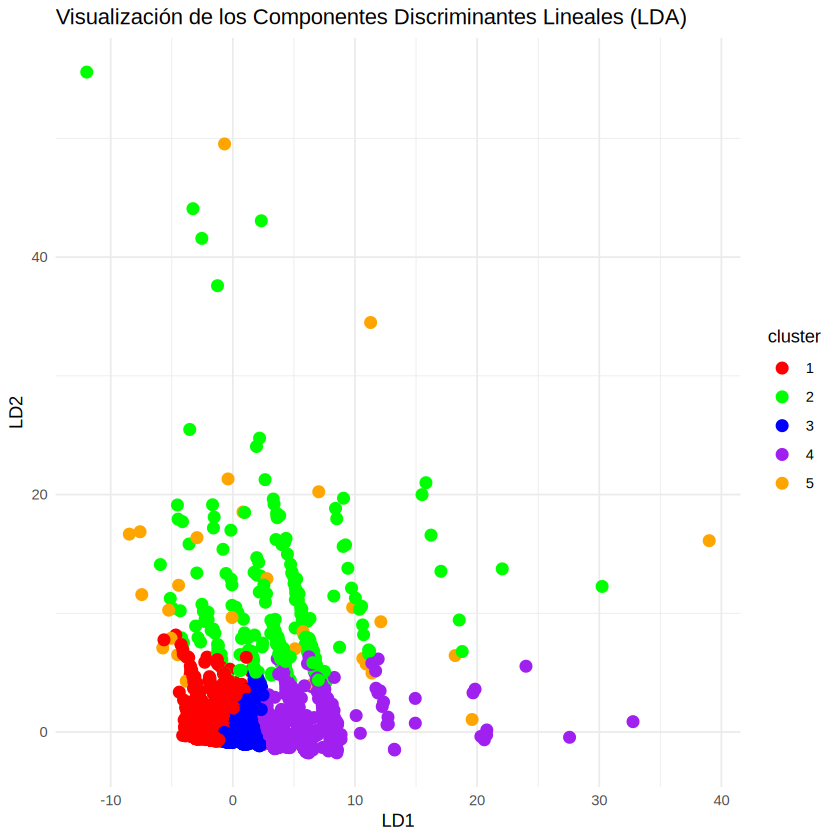

In [45]:
# Predicciones del modelo LDA
lda_predictions <- predict(lda_result)

# Crear un nuevo data frame con los resultados de LDA
lda_data <- data.frame(lda_predictions$x)  # Las proyecciones de los datos en el espacio de los discriminantes
lda_data$cluster <- factor(N_Cluster$cluster)  # Agregar las etiquetas de los clusters

# Visualizar en 2D utilizando ggplot2
library(ggplot2)
ggplot(lda_data, aes(x = LD1, y = LD2, color = cluster)) +
  geom_point(size = 3) +
  labs(title = "Visualización de los Componentes Discriminantes Lineales (LDA)",
       x = "LD1", y = "LD2") +
  scale_color_manual(values = c("red", "green", "blue", "purple", "orange")) +
  theme_minimal()  # Fondo blanco


In [46]:
lda_predictions <- predict(lda_result)

Data_final$lda_class <- lda_predictions$class


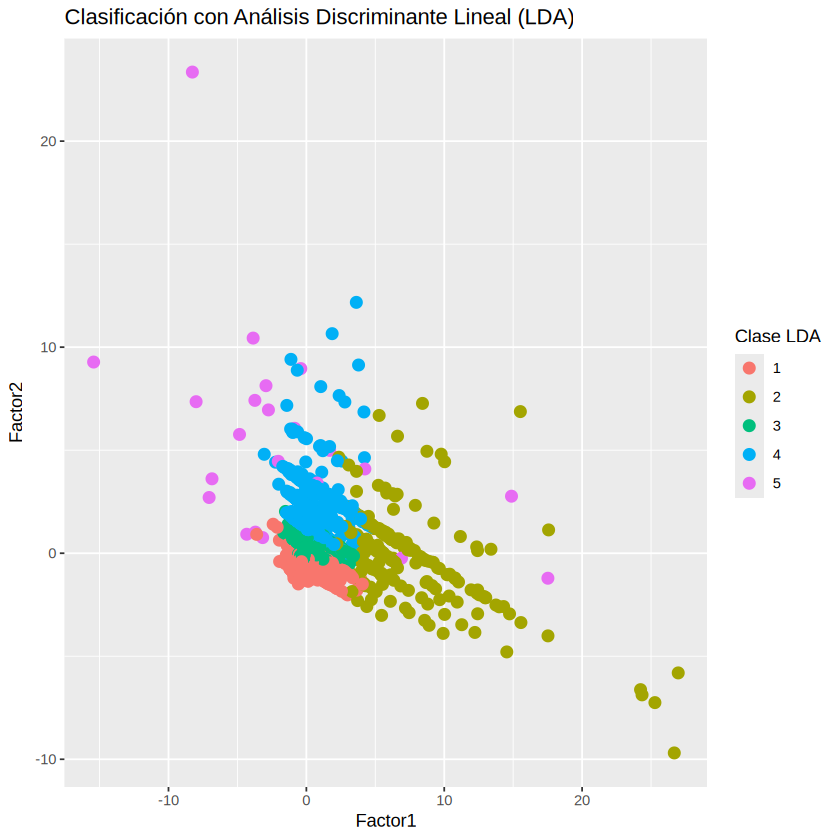

In [47]:
library(ggplot2)

ggplot(Data_final, aes(x = Factor1, y = Factor2, color = factor(lda_class))) +
  geom_point(size = 3) +
  labs(title = "Clasificación con Análisis Discriminante Lineal (LDA)", 
       x = "Factor1", y = "Factor2") +
  scale_color_discrete(name = "Clase LDA")

In [ ]:
predicciones <- predict(object = modelo_lda, newdata = scores_final)
table(scores_final$SEGMENTO, predicciones$class, dnn = c("Clase real", "Clase predicha"))

trainig_error <- mean(scores_final$SEGMENTO != predicciones$class) * 100
paste("trainig_error =", trainig_error, "%")